<a href="https://colab.research.google.com/github/Brainnext/BA_Reviews_Forage_Internship_Programme/blob/main/BA_Airways_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing BeautifuL Soup Library to scrap the website https://www.airlinequality.com/airline-reviews/british-airways

## Importing pandas for data manipulation and data handling. Importing request for fetching data from the url


In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
response = requests.get(base_url)

## This section shows the process of web scrapping using Beautiful Soup. 1000 total reviews were scrapped from the website

In [3]:
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
  print (f"Scrappng page {i}")

  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

  response = requests.get(url)

  content = response.content
  parsed_content = BeautifulSoup(content, 'html.parser')
  for para in parsed_content.find_all("div", {"class": "text_content"}):
    reviews.append(para.get_text())

  print (f"  ---> {len(reviews)} total reviews")

Scrappng page 1
  ---> 100 total reviews
Scrappng page 2
  ---> 200 total reviews
Scrappng page 3
  ---> 300 total reviews
Scrappng page 4
  ---> 400 total reviews
Scrappng page 5
  ---> 500 total reviews
Scrappng page 6
  ---> 600 total reviews
Scrappng page 7
  ---> 700 total reviews
Scrappng page 8
  ---> 800 total reviews
Scrappng page 9
  ---> 900 total reviews
Scrappng page 10
  ---> 1000 total reviews


### The scrap reviews were then turned from ordinary list into a dataframe with the help of pandas framework.

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Having had some rough experi...
1,✅ Trip Verified | This comfortable flight wa...
2,Not Verified | Punta Cana Terminal B check in...
3,✅ Trip Verified | The employee at Venice Air...
4,"✅ Trip Verified | I had only 1 bag with me, ..."


### The data in the dataframe is then saved in a csv format using pandas library function

In [5]:
df.to_csv("BA_Reviews.csv")

In [6]:
data = pd.read_csv("BA_Reviews.csv")
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Having had some rough experi...
1,1,✅ Trip Verified | This comfortable flight wa...
2,2,Not Verified | Punta Cana Terminal B check in...
3,3,✅ Trip Verified | The employee at Venice Air...
4,4,"✅ Trip Verified | I had only 1 bag with me, ..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [8]:
df.shape # 1000 rows and 1 columns

(1000, 1)

## Data Handling with the use of pandas library. The following helped clean, check for duplicates etc

In [9]:
df.isnull().sum() # Check for missing values in the whole dataframe

,0
reviews,0


In [10]:
df.drop_duplicates(inplace=True) # drop duplicates data in the original dataframe without creating a new copy hence the inplace=True

In [11]:
df['reviews'] = df['reviews'].str.strip()

In [12]:
df['reviews'] = df['reviews'].str.lower()

## Regular Expression was imported to manipulate and remove certain words and emojis from the dataset before we can then visuaize the dataset to get an insight.

In [13]:
import re

df['reviews'] = df['reviews'].str.replace(r'^✅?\s*(Trip Verified|Not Verified)\s*\|\s*', '', regex=True)

In [14]:
df.head()

,reviews
0,✅ trip verified | having had some rough experi...
1,✅ trip verified | this comfortable flight wa...
2,not verified | punta cana terminal b check in...
3,✅ trip verified | the employee at venice air...
4,"✅ trip verified | i had only 1 bag with me, ..."


In [15]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ trip verified | london to bangkok. what an ...
freq,1


## Visualization on frequent words

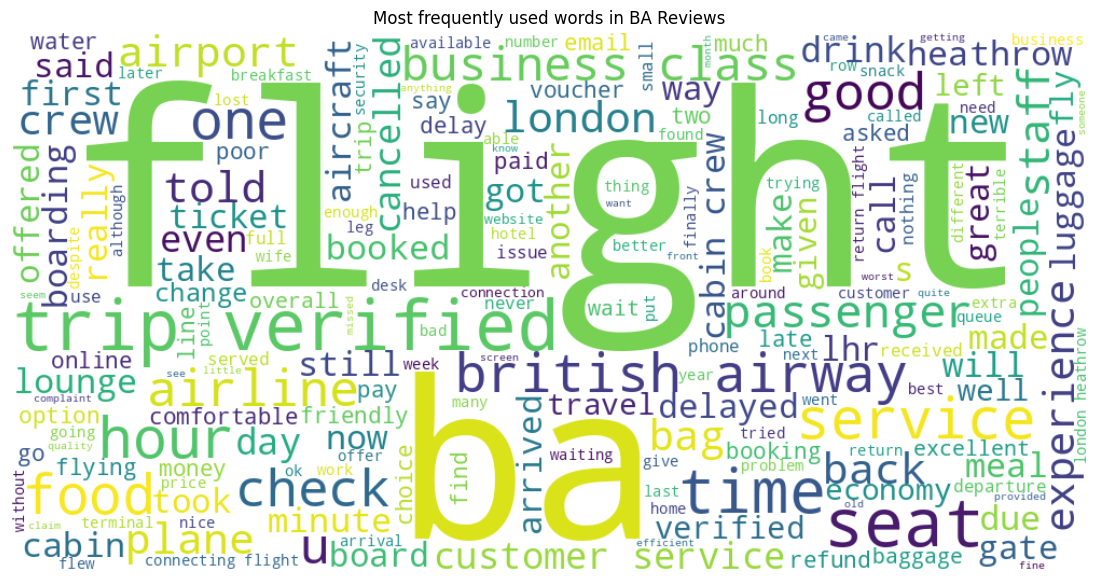

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ''.join(df['reviews'])
wordcloud = WordCloud(width = 1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequently used words in BA Reviews')
plt.show()

## Sentiment Analysis of BA Reviews

In [17]:
from textblob import TextBlob

# Create a seniment score
df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a sentiment labels
df['sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x>0 else 'Negative' if x<0 else 'Neutral')

# Plot sentiment distribution
import seaborn as sns


<ipython-input-18-3e348b250dc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


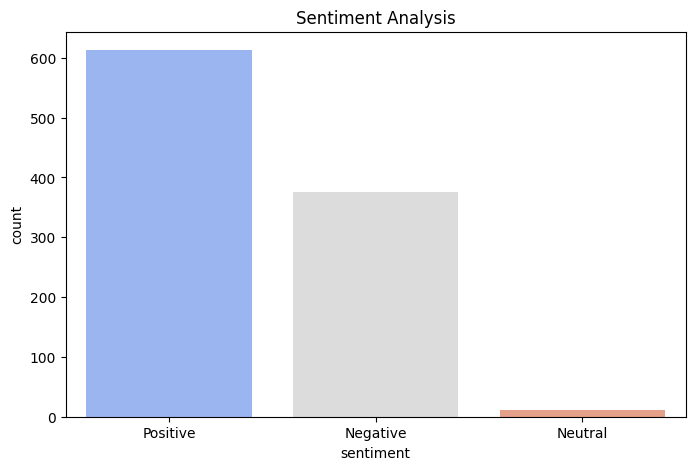

In [18]:
plt.figure(figsize=(8,5))
plt.title("Sentiment Analysis")
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.show()

## This visualization is to show the 20 most common words used in the dataset.

<ipython-input-19-ba89d5a1fa9b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=count, palette='coolwarm')


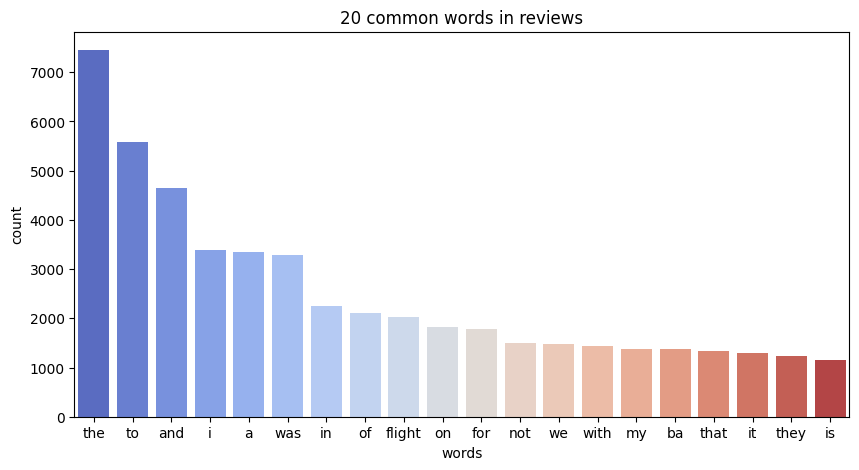

In [19]:
from collections import Counter
import re

# Tokenize and clean
words = ''.join(df['reviews']).lower()
words = re.findall(r'\b\w+\b', words)
word_freq = Counter(words)

common_words = word_freq.most_common(20)
words, count = zip(*common_words)

plt.figure(figsize=(10,5))
plt.title("20 common words in reviews")
plt.xlabel("words")
plt.ylabel('count')
sns.barplot(x=words, y=count, palette='coolwarm')
plt.show()


In [20]:
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Having had some rough experi...
1,1,✅ Trip Verified | This comfortable flight wa...
2,2,Not Verified | Punta Cana Terminal B check in...
3,3,✅ Trip Verified | The employee at Venice Air...
4,4,"✅ Trip Verified | I had only 1 bag with me, ..."


## Visualising how many Trip Verified and Not Verified trips are there in the whole reviews dataset

<ipython-input-23-3d9110986f93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='verified', palette='Set2')


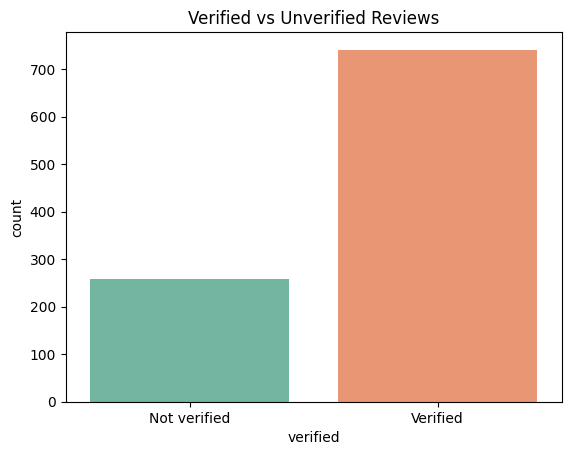

In [23]:
df['verified'] = df['reviews'].str.contains('Trip Verified', case=False)

sns.countplot(data=df, x='verified', palette='Set2')
plt.title("Verified vs Unverified Reviews")
plt.xticks([0, 1], ['Not verified', 'Verified'])
plt.show()